# Определение стоимости автомобилей

# Введение

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Необходимо построить модель для определения стоимости.

Требования заказчика:

    - качество предсказания;
    - скорость предсказания;
    - время обучения.


План работы:

1. Подготовка данных:
        1.1. Открытие и изучиние файлов;
        1.2. Предобработка данных;
        1.3. Вывод
2. Обучение моделей:
        2.1. модель1;
        2.2. модель2;
        2.3. Модель3;
3. Анализ скорости и качества моделей:
        3.1. Функция для вычисления итоговой sMAPE;
        3.2. Обучиние разных моделей и оценка их качества кросс-валидацией; 
4. Вывод.


Описание данных:

Признаки:

    - DateCrawled — дата скачивания анкеты из базы
    - VehicleType — тип автомобильного кузова
    - RegistrationYear — год регистрации автомобиля
    - Gearbox — тип коробки передач
    - Power — мощность (л. с.)
    - Model — модель автомобиля
    - Kilometer — пробег (км)
    - RegistrationMonth — месяц регистрации автомобиля
    - FuelType — тип топлива
    - Brand — марка автомобиля
    - NotRepaired — была машина в ремонте или нет
    - DateCreated — дата создания анкеты
    - NumberOfPictures — количество фотографий автомобиля
    - PostalCode — почтовый индекс владельца анкеты (пользователя)
    - LastSeen — дата последней активности пользователя
    
Целевой признак
    - Price — цена (евро)
    
    
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-2">Введение</a></span><ul class="toc-item"><li><span><a href="#1.-Подготовка-данных" data-toc-modified-id="1.-Подготовка-данных-2.1">1. Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#1.1-Открытие-и-изучиние-файлов" data-toc-modified-id="1.1-Открытие-и-изучиние-файлов-2.1.1">1.1 Открытие и изучиние файлов</a></span></li><li><span><a href="#1.2.-Предобработка-данных" data-toc-modified-id="1.2.-Предобработка-данных-2.1.2">1.2. Предобработка данных</a></span></li><li><span><a href="#1.3.-Вывод" data-toc-modified-id="1.3.-Вывод-2.1.3">1.3. Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.2">Обучение моделей</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-2.2.0.1">Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2.0.2">Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2.0.3">Случайный лес</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.0.4">Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-2.3">Анализ моделей</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-2.3.0.1">Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.3.0.2">Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3.0.3">Случайный лес</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.3.0.4">LightGBM</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4">Вывод</a></span></li></ul></li></ul></div>

## 1. Подготовка данных
### 1.1 Открытие и изучиние файлов

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
sale = pd.read_csv('/datasets/autos.csv')
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [3]:
sale.head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
(sale.isna().mean()*100).round(1)

DateCrawled           0.0
Price                 0.0
VehicleType          10.6
RegistrationYear      0.0
Gearbox               5.6
Power                 0.0
Model                 5.6
Kilometer             0.0
RegistrationMonth     0.0
FuelType              9.3
Brand                 0.0
NotRepaired          20.1
DateCreated           0.0
NumberOfPictures      0.0
PostalCode            0.0
LastSeen              0.0
dtype: float64

##### Вывод:
В загруженном датасете  имеется 354 370 записей, один целевой признак - Price.

Пропуски:
    - 10 % - VehicleType
    - 5 % - Gearbox
    - 5 % - Model
    - 9 % - FuelType
    - 20 % - NotRepaired
    
Для последующего анализа необходимо провести предобработку данных: 
    - решить проблему с пропущенными значениями в столбцах;
    - изменить тип данных;
    - изменить названия столбцов
    - исправить ошибки в данных.

### 1.2. Предобработка данных
##### 1.2.1 Названия столбцов

Названия колонок приведены к нижнему регистру для удобства.

Удадлены столбцы, не отображающие категиориальные признаки автомобиля: DateCrawled, RegistrationMonth, DateCreated, NumberOfPictures, PostalCode, LastSeen:

In [5]:
sale.columns = sale.columns.str.lower()
sale.columns = ['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen']
sale.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'not_repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

##### 1.2.2 Преобработк дат

In [6]:
sale['date_created'] = pd.to_datetime(sale['date_created'])
sale['date_crawled'] = pd.to_datetime(sale['date_crawled'])
sale['last_seen'] = pd.to_datetime(sale['last_seen'])



In [7]:
sale['date_created'].describe()

count                  354369
unique                    109
top       2016-04-03 00:00:00
freq                    13719
first     2014-03-10 00:00:00
last      2016-04-07 00:00:00
Name: date_created, dtype: object

In [8]:
sale['date_crawled'].describe()

count                  354369
unique                 271174
top       2016-03-24 14:49:47
freq                        7
first     2016-03-05 14:06:22
last      2016-04-07 14:36:58
Name: date_crawled, dtype: object

In [9]:
sale['last_seen'].describe()

count                  354369
unique                 179150
top       2016-04-06 13:45:54
freq                       17
first     2016-03-05 14:15:08
last      2016-04-07 14:58:51
Name: last_seen, dtype: object

Основная активность пользоваться на сервисе март-апрель 2016 года.

##### 1.2.3 Предобработка цен

In [10]:
sale['price'].describe()

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64

In [11]:
sale['price'].loc[(sale['price']==0)].count()*100/354369

3.0397692800442475

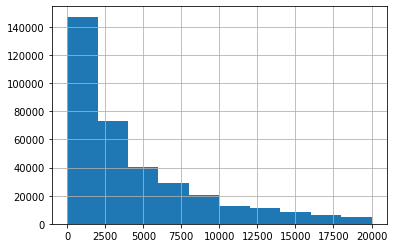

In [12]:
sale['price'].hist()
plt.show()

Цена при продажах не должна ровняться  0. Процент некорректных данных меньше 5%, поэтому предлагаю их удалить.

In [13]:
sale = sale.loc[(sale['price']>0)]

##### 1.2.4 Год регистрации 


In [14]:
sale['registration_year'].describe()

count    343597.000000
mean       2004.089797
std          78.413225
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

In [15]:
np.percentile(sale['registration_year'],[1,99])

array([1980., 2018.])

In [16]:
sale = sale[(sale['registration_year']>=1980 )& (sale['registration_year']<=2016)]

In [17]:
sale['registration_year'].describe()

count    326652.000000
mean       2002.913719
std           6.029333
min        1980.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: registration_year, dtype: float64

Выброс в годах: значение не может быть равно 1000 или 9999. Поэтому был выбран перцентиль 1% - 1980. Также известно, что данные были выгружены в 2016 году, поэтому данные неудовлтворяющие условию удалены.

##### 1.2.5 Замена пропусков

In [18]:
sale['model'].isna().sum()

14910

Таблица самых популярных моделей для каждого бренда.

In [19]:
top_model = sale.groupby(['brand'])['model'].agg(pd.Series.mode).to_frame()
top_model = top_model.rename(columns={'model': 'top_model'})
top_model = top_model.reset_index()
top_model.head(5)

,brand,top_model
0,alfa_romeo,156
1,audi,a4
2,bmw,3er
3,chevrolet,other
4,chrysler,other


In [20]:
sale = sale.merge(top_model, left_on='brand', right_on='brand', how='left')

#Замена нулей в столбце model
sale['model'] = sale['model'].fillna(sale.top_model)
sale['model'] = sale['model'].astype('str')

#Кол-во пропусков
sale = sale.drop('top_model', axis=1)
sale.isna().sum()

date_crawled              0
price                     0
vehicle_type          19681
registration_year         0
gearbox               15054
power                     0
model                     0
kilometer                 0
registration_month        0
fuel_type             23625
brand                     0
not_repaired          58997
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

Нулевые значения заменены на популярные модели каждого бренда

In [21]:
columns = ['fuel_type', 'gearbox', 'vehicle_type']
for col in columns:
    '''Цикл для каждого столбца создаёт таблицу популярных значений, 
    Таблицу присоединяют к sale,
    заменяют пропущенные значения.'''
    top_smth = sale.groupby(['model'])[col].agg(pd.Series.mode).to_frame()
    top_smth = top_smth.rename(columns={col: 'top'})
    top_smth = top_smth.reset_index()
    
    
    sale = sale.merge(top_smth, left_on='model', right_on='model', how='left')
    

    #Замена нулей в столбце 'vehicle_type'
    sale[col] = sale[col].fillna(sale.top)
    sale[col] = sale[col].astype('str')

    #Удаление промежуточных столбцов
    sale = sale.drop('top', axis=1)


In [22]:
sale.isna().sum()

date_crawled              0
price                     0
vehicle_type              0
registration_year         0
gearbox                   0
power                     0
model                     0
kilometer                 0
registration_month        0
fuel_type                 0
brand                     0
not_repaired          58997
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

##### 1.2.6 Мощность

In [23]:
sale['power'].describe()

count    326652.000000
mean        112.221186
std         183.348304
min           0.000000
25%          71.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

In [24]:
sale[sale['power']==0].head(10)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
28,2016-03-15 20:59:01,245,sedan,1994,manual,0,golf,150000,2,petrol,volkswagen,no,2016-03-15,0,44145,2016-03-17 18:17:43
33,2016-03-28 17:50:15,1500,bus,2016,manual,0,kangoo,150000,1,gasoline,renault,no,2016-03-28,0,46483,2016-03-30 09:18:02
47,2016-03-17 07:56:40,4700,wagon,2005,manual,0,signum,150000,0,gasoline,opel,no,2016-03-17,0,88433,2016-04-04 04:17:32
48,2016-03-26 10:39:35,550,wagon,1999,manual,0,astra,150000,8,gasoline,opel,yes,2016-03-26,0,56759,2016-04-01 23:17:27
60,2016-04-01 11:56:40,1200,coupe,2001,manual,0,astra,150000,0,petrol,opel,NaN,2016-04-01,0,47249,2016-04-07 08:46:07
61,2016-03-08 01:36:42,800,small,1993,manual,0,polo,150000,3,petrol,volkswagen,no,2016-03-08,0,8258,2016-04-05 23:46:00
81,2016-03-23 11:53:21,2400,sedan,2003,manual,0,a4,150000,9,gasoline,audi,NaN,2016-03-23,0,40210,2016-03-23 11:53:21
85,2016-03-28 16:37:43,8390,wagon,2009,manual,0,insignia,150000,0,gasoline,opel,NaN,2016-03-28,0,29221,2016-03-30 07:44:59
89,2016-03-11 19:00:25,4290,bus,2008,manual,0,combo,150000,2,gasoline,opel,no,2016-03-11,0,23568,2016-04-05 22:45:32


Нулевые значения скорее всего являются пропусками, поэтому предлагаю их заменить на среднне значения для каждой модели.

In [25]:
med_power = sale.groupby(['model'])['power'].agg('mean')
med_power = med_power.reset_index()
med_power = med_power.rename(columns={'power': 'med_power'})

sale = sale.merge(med_power, left_on='model', right_on='model', how='left')

sale.loc[sale['power']==0, 'power'] = sale['med_power']

sale['power'] = sale['power'].astype('int')


sale = sale.drop('med_power', axis=1)


In [26]:
sale['power'].describe()

count    326652.000000
mean        122.406252
std         180.067284
min           1.000000
25%          75.000000
50%         110.000000
75%         144.000000
max       20000.000000
Name: power, dtype: float64

In [27]:
np.percentile(sale['power'],[0.5,99.5])

array([ 41., 334.])

In [28]:
sale[sale['power']>334].count()

date_crawled          1600
price                 1600
vehicle_type          1600
registration_year     1600
gearbox               1600
power                 1600
model                 1600
kilometer             1600
registration_month    1600
fuel_type             1600
brand                 1600
not_repaired          1328
date_created          1600
number_of_pictures    1600
postal_code           1600
last_seen             1600
dtype: int64

In [29]:
sale = sale[sale['power']<334]

Также достаточно странное явление показатели мощности в 20000л.с., предлагаю от них избавиться, так как их меньше 1%

##### 1.2.6 Пробег 

In [30]:
sale['kilometer'].describe()

count    324969.000000
mean     128572.263816
std       37149.825002
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

Минимальный - 5000, Средний - 128572, данные корректны, в правказ не нуждаются.

##### 1.2.7 Месяц регистрации

In [31]:
sale['registration_month'].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9])

In [32]:
sale[sale['registration_month']==0].sample(5)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
316030,2016-03-14 22:52:16,1600,small,1999,manual,116,golf,150000,0,gasoline,volkswagen,NaN,2016-03-14,0,73540,2016-03-15 18:48:07
264216,2016-03-28 10:39:46,1200,sedan,1993,auto,239,7er,150000,0,petrol,bmw,yes,2016-03-28,0,45966,2016-04-06 11:46:58
3652,2016-03-07 00:53:20,1,small,2001,manual,55,lupo,150000,0,petrol,volkswagen,yes,2016-03-06,0,91207,2016-03-12 02:46:04
30932,2016-03-21 19:45:37,450,sedan,2016,manual,88,3_reihe,125000,0,petrol,mazda,yes,2016-03-21,0,78567,2016-04-06 21:47:26
125957,2016-03-08 01:36:21,100,convertible,1995,manual,92,tigra,150000,0,petrol,opel,NaN,2016-03-08,0,6773,2016-04-06 00:47:03


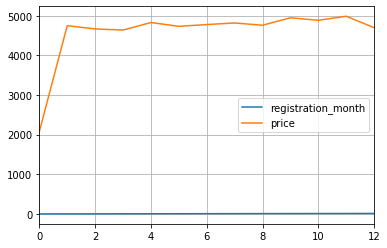

In [33]:
month = sale.groupby(['registration_month'])['price'].agg('mean')
month = month.reset_index()
month.plot(grid=True)
plt.show()

In [34]:
sale = sale.drop('registration_month', axis=1)

Особой зависимости от месяца не вижу, поэтому данный столец в обучении модели можно не использовать

##### 1.2.8 Ремонт

In [35]:
sale[sale['not_repaired'].isnull()].sample(5)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
65141,2016-03-21 20:52:28,5799,other,2005,auto,150,zafira,125000,gasoline,opel,NaN,2016-03-21,0,33014,2016-03-27 06:44:47
71534,2016-03-19 13:43:59,750,small,1997,manual,45,fiesta,125000,petrol,ford,NaN,2016-03-19,0,41515,2016-03-19 13:43:59
203144,2016-03-17 16:38:32,3900,small,2004,manual,64,polo,50000,petrol,volkswagen,NaN,2016-03-17,0,22041,2016-03-20 18:26:10
253056,2016-03-16 18:51:45,1750,small,2005,manual,75,2_reihe,150000,petrol,peugeot,NaN,2016-03-16,0,88480,2016-03-19 17:17:23
276191,2016-03-06 14:44:16,3000,sedan,2003,manual,75,golf,150000,petrol,volkswagen,NaN,2016-03-06,0,34327,2016-03-20 12:44:59


In [36]:
sale['not_repaired'] = sale['not_repaired'].fillna('no')

In [37]:
sale['not_repaired'].isnull().sum()

0

Пропуски в столбце скорее всего обусловлены отсутсвием ремонта, поэтому предлгаю заменить на значение 'no'.


##### 1.2.9 Фотографии

In [38]:
sale['number_of_pictures'].unique()

array([0])

In [39]:
sale = sale.drop('number_of_pictures', axis=1)

Фотографий нет вообще, поэтому отсутствие столбца никак не изменит обучение модели.

##### 1.2.10 Удаление столбцов

In [40]:
columns_to_del = ['postal_code', 'date_crawled', 'date_created', 'last_seen']

sale = sale.drop(columns_to_del, axis=1)

In [41]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324969 entries, 0 to 326651
Data columns (total 10 columns):
price                324969 non-null int64
vehicle_type         324969 non-null object
registration_year    324969 non-null int64
gearbox              324969 non-null object
power                324969 non-null int64
model                324969 non-null object
kilometer            324969 non-null int64
fuel_type            324969 non-null object
brand                324969 non-null object
not_repaired         324969 non-null object
dtypes: int64(4), object(6)
memory usage: 27.3+ MB


Данные столбцы в обучении модели можно не использовать

In [42]:
t = sale.copy()
encoder = OrdinalEncoder()
col = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
encoder.fit(t[col])
t[col] = encoder.transform(t[col])

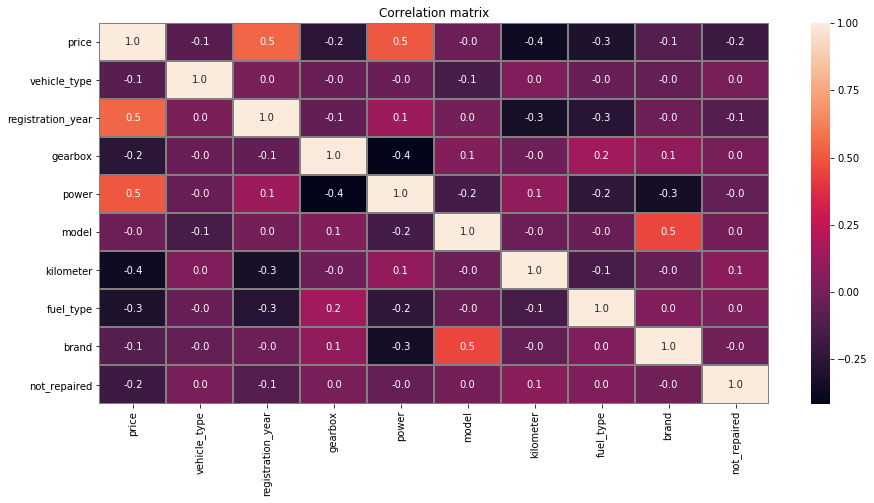

In [43]:
cm = t.corr()
plt.figure(figsize=(15,7))
plt.title('Correlation matrix')
sns.heatmap(cm, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
plt.show()

In [44]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324969 entries, 0 to 326651
Data columns (total 10 columns):
price                324969 non-null int64
vehicle_type         324969 non-null object
registration_year    324969 non-null int64
gearbox              324969 non-null object
power                324969 non-null int64
model                324969 non-null object
kilometer            324969 non-null int64
fuel_type            324969 non-null object
brand                324969 non-null object
not_repaired         324969 non-null object
dtypes: int64(4), object(6)
memory usage: 27.3+ MB


### 1.3. Вывод

Данные предобработаны: пропущеных значений нет, столбцы приведены к нужному формату, лишние переменные удалены.
Сильно скоррелированных признаков нет, кроме моделей и брендов. 

## Обучение моделей

Перекодировка признаков порядковым методом.

In [45]:
encoder = OrdinalEncoder()
col = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
encoder.fit(sale[col])

sale[col] = encoder.transform(sale[col])
sale.head(5)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
0,480,4.0,1993,1.0,96,117.0,150000,6.0,38.0,0.0
1,18300,2.0,2011,1.0,190,30.0,125000,2.0,1.0,1.0
2,9800,6.0,2004,0.0,163,118.0,125000,2.0,14.0,0.0
3,1500,5.0,2001,1.0,75,117.0,150000,6.0,38.0,0.0
4,3600,5.0,2008,1.0,69,102.0,90000,2.0,31.0,0.0


Выделение тренировочной и тестовой выборки.

In [46]:
features_train, features_test, target_train, target_test = train_test_split(
    sale.drop('price', axis=1), sale.price, test_size=0.2, random_state=12345)

#### Линейная регрессия
Масштабировка признаков

In [47]:
scaler = StandardScaler()
scaler.fit(features_train)
f_train_st = scaler.transform(features_train)
f_test_st = scaler.transform(features_test)
f_train_st = pd.DataFrame(f_train_st)
f_train_st.head()

,0,1,2,3,4,5,6,7,8
0,1.302333,0.677097,0.489121,0.502932,-1.375217,0.576781,-1.487014,-1.414931,-0.333166
1,-2.057636,0.179951,0.489121,-0.181361,1.632360,0.576781,-1.487014,1.291773,-0.333166
2,0.342342,-0.317195,0.489121,-0.865654,1.674920,0.576781,0.680923,0.464724,3.001508
3,-0.137654,-1.808634,0.489121,1.046341,-1.375217,0.576781,0.680923,-1.414931,-0.333166
4,-1.097645,1.008528,0.489121,0.080280,1.306066,-0.096127,0.680923,1.291773,-0.333166


In [48]:
%%time
    
model = LinearRegression()
mse_line = cross_val_score(model, f_train_st, target_train, cv=5, scoring=make_scorer(mean_squared_error))
rmse_line = (mse_line**0.5).mean()

print('RMSE для линейной регрессии:', rmse_line)


RMSE для линейной регрессии: 2854.8197500318797
CPU times: user 598 ms, sys: 349 ms, total: 947 ms
Wall time: 919 ms


In [49]:
time = []
rmse_list = []
time.append(1)
rmse_list.append(rmse_line.round(2))

#### Дерево решений

In [50]:
%%time
best_model = None
best_rmse = 4000

for depth in range(1, 10, 3):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    mse_dec = cross_val_score(model, features_train, target_train, cv=5, scoring=make_scorer(mean_squared_error))
    rmse_dec = (mse_line**0.5).mean()
    if rmse_dec < best_rmse:
        best_rmse = rmse_dec
        best_depth = depth
        best_model = model

print('RMSE для DecisionTreeRegressor:', best_rmse,'\nГлубина:',best_depth,'\n')

RMSE для DecisionTreeRegressor: 2854.8197500318797 
Глубина: 1 

CPU times: user 3.61 s, sys: 0 ns, total: 3.61 s
Wall time: 3.61 s


In [51]:
time.append(3.6)
rmse_list.append(best_rmse.round(2))

#### Случайный лес

In [52]:
%%time
best_model = None
best_rmse = 4000
best_est = 0
best_depth = 0
for est in range( 9, 50, 10):
    for depth in range(1, 8, 3):
        model = RandomForestRegressor(random_state=12345, max_depth=7, n_estimators=est)
        mse = cross_val_score(model,  f_test_st, target_test, cv=5, scoring=make_scorer(mean_squared_error))
        rmse = (mse**0.5).mean()
        if rmse < best_rmse:
            best_model = model
            best_rmse = rmse
            best_depth = depth
            best_est = est
            
print('RMSE для RandomForestRegressor:', best_rmse,'\nГлубина:',best_depth,'\nКоличество деревьев:', best_est, '\n')

RMSE для RandomForestRegressor: 2064.9987486582204 
Глубина: 1 
Количество деревьев: 49 

CPU times: user 2min 10s, sys: 50.8 ms, total: 2min 10s
Wall time: 2min 11s


In [53]:
time.append(2*60 + 11)
rmse_list.append(best_rmse.round(2))

##### LightGBM

In [54]:
col = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
features_train_cat = features_train
features_train_cat[col] = features_train_cat[col].astype('category')

In [55]:
%%time
best_model = None
best_rmse = 4000
best_count_eterations = 0
best_est = 0
best_depth = 0
for est in range(9, 50, 10):
    model = LGBMRegressor(random_state=12345, depth=3, n_estimators=est)
    mse = cross_val_score(model, features_train_cat, target_train, scoring=make_scorer(mean_squared_error), cv=5, n_jobs=-1)
    rmse = (mse**0.5).mean()
    if rmse < best_rmse:
        best_model = model
        best_rmse = rmse
        best_depth = depth
        best_est = est
            
        
print('RMSE для LightGBM:', best_rmse,'\nГлубина: 3\nКоличество деревьев:', best_est, '\n')

RMSE для LightGBM: 1679.5889344267828 
Глубина: 3
Количество деревьев: 49 

CPU times: user 1min 27s, sys: 426 ms, total: 1min 28s
Wall time: 1min 29s


In [56]:
time.append(1*60+35)
rmse_list.append(best_rmse.round(2))
index_list = ['Линейная регрессия', 'Дерево решений', "Случайный лес", 'LightGBM']
d = {'t, c': time, 'RMSE': rmse_list}
df_train = pd.DataFrame(data=d, index = index_list)
df_train

,"t, c",RMSE
Линейная регрессия,1.0,2854.82
Дерево решений,3.6,2854.82
Случайный лес,131.0,2065.00
LightGBM,95.0,1679.59


#### Вывод
Наименьшее RMSE у модели градиентного бустинга: 1679

## Анализ моделей

#### Линейная регрессия

In [57]:
%%time

model = LinearRegression()
model.fit(f_train_st, target_train)
predictions = model.predict(f_test_st)
rmse_line = (mean_squared_error(target_test, predictions)**0.5).mean()

print('RMSE для линейной регрессии на тестовых данных:', rmse_line)

RMSE для линейной регрессии на тестовых данных: 2837.4231224781383
CPU times: user 61.3 ms, sys: 28.3 ms, total: 89.6 ms
Wall time: 78.8 ms


In [58]:
time = []
rmse_list = []
time.append(0.05)
rmse_list.append(rmse_line.round(2))

#### Дерево решений 

In [59]:
%%time

model = DecisionTreeRegressor(max_depth=1, random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
rmse_dec = (mean_squared_error(target_test, predictions)**0.5).mean()


print('RMSE для DecisionTreeRegressor:', rmse_dec,'\nГлубина: 1\n')

RMSE для DecisionTreeRegressor: 3563.7084187110777 
Глубина: 1

CPU times: user 232 ms, sys: 32.5 ms, total: 265 ms
Wall time: 280 ms


In [60]:
time.append(0.2)
rmse_list.append(rmse_dec.round(2))

#### Случайный лес

In [61]:
%%time

model = RandomForestRegressor(max_depth=7, n_estimators=49 , random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
rmse_rand= (mean_squared_error(target_test, predictions)**0.5).mean()


print('RMSE для RandomForestRegressor:', rmse_rand,'\nГлубина: 3\nКоличество деревьев: 49\n')

RMSE для RandomForestRegressor: 2083.0872525525774 
Глубина: 3
Количество деревьев: 49

CPU times: user 16.5 s, sys: 34 ms, total: 16.5 s
Wall time: 16.9 s


In [62]:
time.append(16)
rmse_list.append(rmse_rand.round(2))

#### LightGBM

In [63]:
features_test_cat = features_test
features_test_cat[col] = features_test_cat[col].astype('category')

In [64]:
%%time 

model = LGBMRegressor(random_state=12345, depth=3, n_estimators=49)
model.fit(features_train_cat, target_train)
predictions = model.predict(features_test_cat)
rmse_gbm = (mean_squared_error(target_test, predictions)**0.5).mean()

print('RMSE для LightGBM:', rmse_gbm,'\nГлубина: 3\nКоличество деревьев:', best_est, '\n')

RMSE для LightGBM: 1651.9075360622621 
Глубина: 3
Количество деревьев: 49 

CPU times: user 6.05 s, sys: 21.6 ms, total: 6.07 s
Wall time: 6.08 s


In [65]:
time.append(6)
rmse_list.append((rmse_gbm).round(2))
index_list = ['Линейная регрессия', 'Дерево решений', "Случайный лес", 'LightGBM']
d = {'t, c': time, 'RMSE': rmse_list}
df_test = pd.DataFrame(data=d, index = index_list)

In [66]:
df_test

,"t, c",RMSE
Линейная регрессия,0.05,2837.42
Дерево решений,0.20,3563.71
Случайный лес,16.00,2083.09
LightGBM,6.00,1651.91


## Вывод
Проведена прдобработка данных и обучена модель линейной регрессией, случайным лесом, деревом решиний и градиентным буститнгом.
Наилучшие показатели метрики показала модель, обученная градиентым бустингом: RMSE для LightGBM: 1651, при этом быстрее всех обучилась линейная регрессия, но Rmse = 2837.

Исходя из  результатов теста предлагаю модель градиентного бустинга, так как качество опережает существенно все остальные модели, а время предсказания меньше случайного леса/.

